In [7]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta
from pathlib import Path
import sys
import warnings
warnings.filterwarnings('ignore')

# Thêm project root
project_root = Path.cwd().parent
sys.path.append(str(project_root))

from src.preprocessing.technical_indicators import TechnicalIndicators

# Cấu hình
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print('✅ Import thành công!')

✅ Import thành công!


In [2]:
# Đường dẫn
DATA_DIR = Path('../data/processed')

print("📂 Đang load dữ liệu có RSI...")

btc_5m = pd.read_csv(DATA_DIR / 'BTCUSDT_5m_rsi.csv')
eth_5m = pd.read_csv(DATA_DIR / 'ETHUSDT_5m_rsi.csv')
btc_1d = pd.read_csv(DATA_DIR / 'BTCUSDT_1d_rsi.csv')
eth_1d = pd.read_csv(DATA_DIR / 'ETHUSDT_1d_rsi.csv')

# Chuyển datetime
for df in [btc_5m, eth_5m, btc_1d, eth_1d]:
    df['datetime'] = pd.to_datetime(df['datetime'])

print('✅ Load dữ liệu thành công!\n')
print(f'📊 Số lượng dữ liệu:')
print(f'  • BTC 5m: {len(btc_5m):,} nến')
print(f'  • ETH 5m: {len(eth_5m):,} nến')
print(f'  • BTC 1d: {len(btc_1d):,} nến')
print(f'  • ETH 1d: {len(eth_1d):,} nến')

print(f'\n📋 Columns hiện tại (BTC 5m): {list(btc_5m.columns)}')

📂 Đang load dữ liệu có RSI...
✅ Load dữ liệu thành công!

📊 Số lượng dữ liệu:
  • BTC 5m: 52,416 nến
  • ETH 5m: 52,416 nến
  • BTC 1d: 1,095 nến
  • ETH 1d: 1,095 nến

📋 Columns hiện tại (BTC 5m): ['datetime', 'open', 'high', 'low', 'close', 'volume', 'RSI_14']


In [3]:
# Tính MA7 và MA25 cho BTC 5m
print("🔄 Đang tính MA7 và MA25 cho BTC 5m...")

btc_5m_ma = TechnicalIndicators.add_moving_averages(btc_5m, periods=[7, 25], column='close')

print("✅ Hoàn thành!\n")

# Hiển thị sample
print("📋 Sample dữ liệu với MA:")
print(btc_5m_ma[['datetime', 'close', 'RSI_14', 'MA_7', 'MA_25']].tail(20))

# Kiểm tra NaN
print(f"\n⚠️  MA_7 NaN: {btc_5m_ma['MA_7'].isna().sum()}")
print(f"⚠️  MA_25 NaN: {btc_5m_ma['MA_25'].isna().sum()}")

🔄 Đang tính MA7 và MA25 cho BTC 5m...
✅ Hoàn thành!

📋 Sample dữ liệu với MA:
                 datetime      close     RSI_14           MA_7        MA_25
52396 2025-10-26 06:50:00  111615.10  55.815743  111596.080000  111557.0428
52397 2025-10-26 06:55:00  111646.27  58.706531  111605.350000  111568.1652
52398 2025-10-26 07:00:00  111584.48  51.511700  111597.382857  111572.4340
52399 2025-10-26 07:05:00  111577.54  50.759254  111593.424286  111577.5856
52400 2025-10-26 07:10:00  111576.22  50.607833  111591.120000  111581.7036
52401 2025-10-26 07:15:00  111589.57  52.162133  111593.898571  111588.7320
52402 2025-10-26 07:20:00  111633.34  56.945913  111603.217143  111594.9556
52403 2025-10-26 07:25:00  111742.26  66.045349  111621.382857  111606.3676
52404 2025-10-26 07:30:00  111813.03  70.419834  111645.205714  111618.7632
52405 2025-10-26 07:35:00  111853.88  72.613132  111683.691429  111630.8724
52406 2025-10-26 07:40:00  111844.64  71.324875  111721.848571  111642.3552
52407 2025

In [4]:
# Phân tích MA
TechnicalIndicators.analyze_ma(btc_5m_ma, ['MA_7', 'MA_25'])


📊 PHÂN TÍCH MOVING AVERAGES

MA_7:
  • Số nến có MA: 52,410
  • Min: 92935.26
  • Max: 125783.90
  • Mean: 110676.19
  • NaN đầu tiên: 6

📈 Phân tích tín hiệu MA7 x MA25:
  • Golden Cross (MA7 cắt lên MA25): 1333 lần
  • Death Cross (MA7 cắt xuống MA25): 1332 lần

MA_25:
  • Số nến có MA: 52,392
  • Min: 93227.63
  • Max: 125514.29
  • Mean: 110678.82
  • NaN đầu tiên: 24

📈 Phân tích tín hiệu MA7 x MA25:
  • Golden Cross (MA7 cắt lên MA25): 1333 lần
  • Death Cross (MA7 cắt xuống MA25): 1332 lần


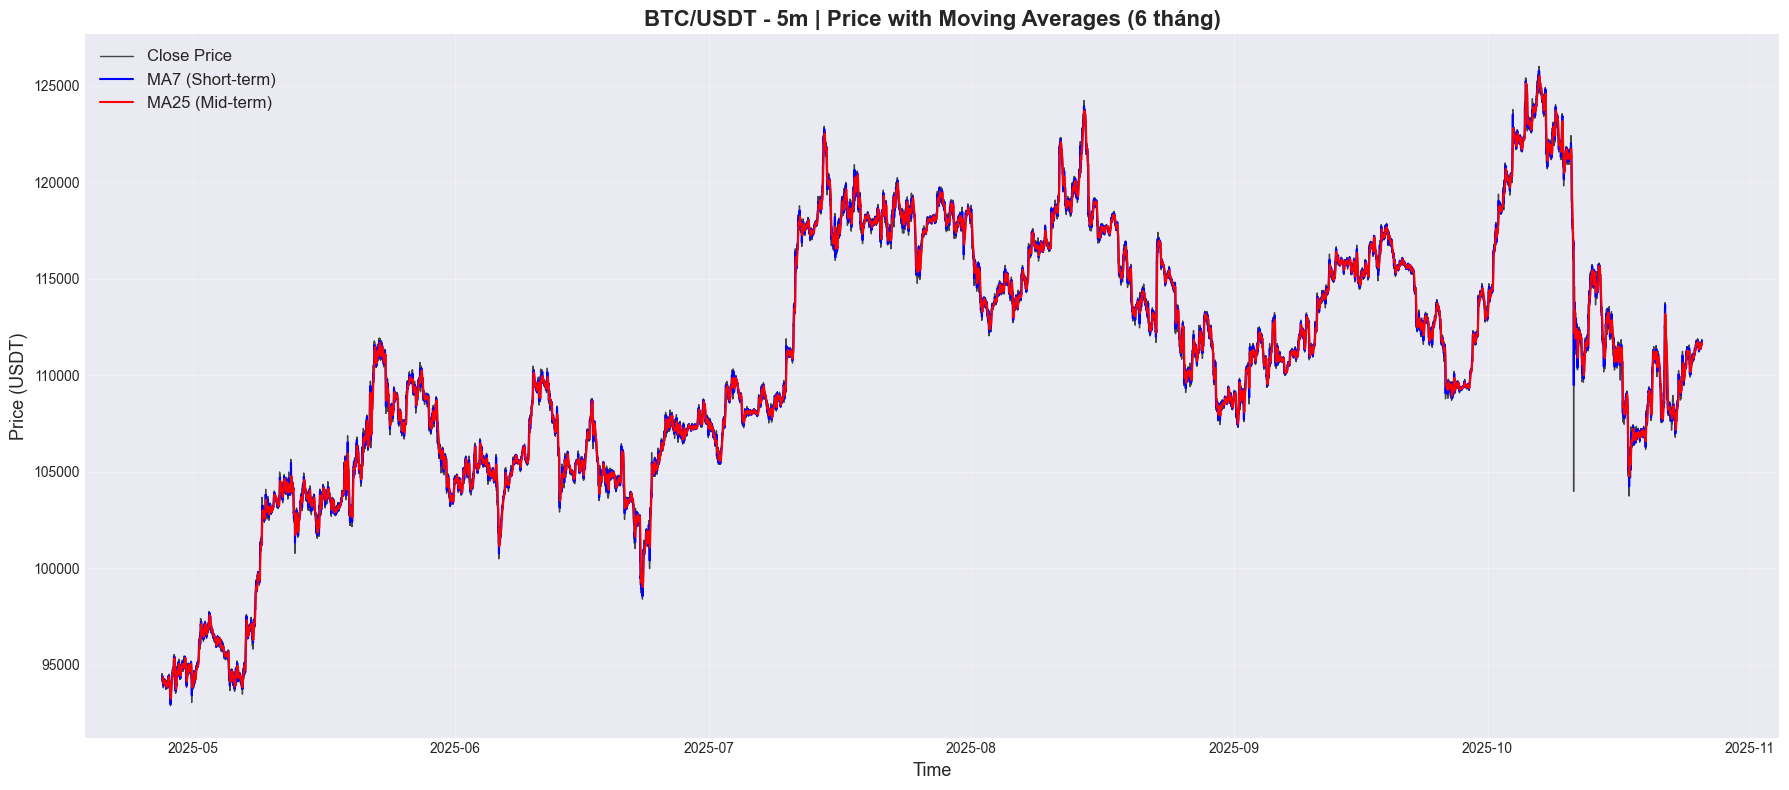

In [5]:
# Vẽ giá với MA7 và MA25
fig, ax = plt.subplots(figsize=(18, 8))

# Giá close
ax.plot(btc_5m_ma['datetime'], btc_5m_ma['close'], 
        label='Close Price', color='black', linewidth=1, alpha=0.7)

# MA7
ax.plot(btc_5m_ma['datetime'], btc_5m_ma['MA_7'], 
        label='MA7 (Short-term)', color='blue', linewidth=1.5)

# MA25
ax.plot(btc_5m_ma['datetime'], btc_5m_ma['MA_25'], 
        label='MA25 (Mid-term)', color='red', linewidth=1.5)

ax.set_title('BTC/USDT - 5m | Price with Moving Averages (6 tháng)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Time', fontsize=13)
ax.set_ylabel('Price (USDT)', fontsize=13)
ax.legend(loc='upper left', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

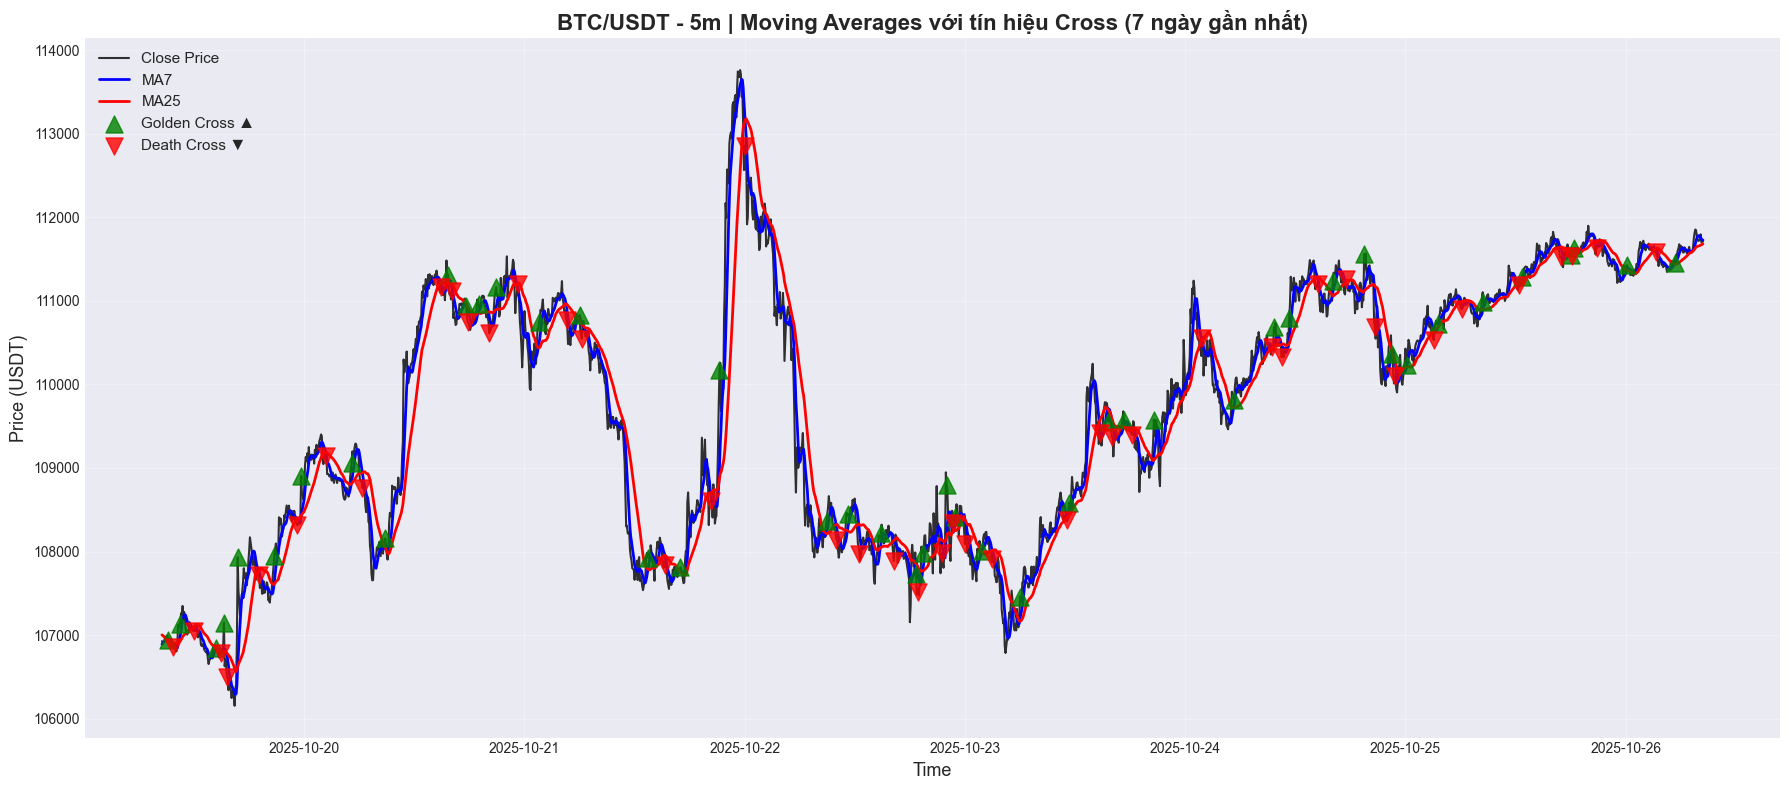

🟢 Golden Cross: 45 lần
🔴 Death Cross: 44 lần


In [6]:
# Zoom vào 7 ngày gần nhất
last_week = btc_5m_ma.tail(7 * 24 * 12).copy()

# Tính tín hiệu cross
last_week['prev_ma7'] = last_week['MA_7'].shift(1)
last_week['prev_ma25'] = last_week['MA_25'].shift(1)

golden_cross = last_week[
    (last_week['MA_7'] > last_week['MA_25']) & 
    (last_week['prev_ma7'] <= last_week['prev_ma25'])
]

death_cross = last_week[
    (last_week['MA_7'] < last_week['MA_25']) & 
    (last_week['prev_ma7'] >= last_week['prev_ma25'])
]

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(18, 8))

# Giá
ax.plot(last_week['datetime'], last_week['close'], 
        label='Close Price', color='black', linewidth=1.5, alpha=0.8)

# MA
ax.plot(last_week['datetime'], last_week['MA_7'], 
        label='MA7', color='blue', linewidth=2)
ax.plot(last_week['datetime'], last_week['MA_25'], 
        label='MA25', color='red', linewidth=2)

# Highlight Golden Cross
if not golden_cross.empty:
    ax.scatter(golden_cross['datetime'], golden_cross['close'], 
              color='green', s=150, marker='^', label='Golden Cross ▲', zorder=5, alpha=0.8)

# Highlight Death Cross
if not death_cross.empty:
    ax.scatter(death_cross['datetime'], death_cross['close'], 
              color='red', s=150, marker='v', label='Death Cross ▼', zorder=5, alpha=0.8)

ax.set_title('BTC/USDT - 5m | Moving Averages với tín hiệu Cross (7 ngày gần nhất)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Time', fontsize=13)
ax.set_ylabel('Price (USDT)', fontsize=13)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"🟢 Golden Cross: {len(golden_cross)} lần")
print(f"🔴 Death Cross: {len(death_cross)} lần")